<a href="https://colab.research.google.com/github/jabir-al-nahian/soil-test-ml/blob/main/soil_test_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Land dataset.csv')

In [ ]:
df.head(5)

,Ca,P,pH,SOC,Sand,Depth
0,-0.295749,-0.041336,-1.129366,0.353258,1.269748,Topsoil
1,-0.387442,-0.231552,-1.531538,-0.264023,1.692209,Subsoil
2,-0.248601,-0.224635,-0.259551,0.064152,2.091835,Topsoil
3,-0.332195,-0.318014,-0.577548,-0.318719,2.118477,Subsoil
4,-0.438350,-0.010210,-0.699135,-0.310905,2.164148,Topsoil


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('Depth',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_features = scaler.transform(df.drop('Depth',axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Ca,P,pH,SOC,Sand
0,-0.282401,-0.026947,-1.196772,0.239023,1.297848
1,-0.368089,-0.218111,-1.633998,-0.301742,1.725401
2,-0.238341,-0.211159,-0.251143,-0.014246,2.129842
3,-0.316460,-0.305003,-0.596857,-0.349658,2.156805
4,-0.415663,0.004335,-0.729041,-0.342813,2.203027


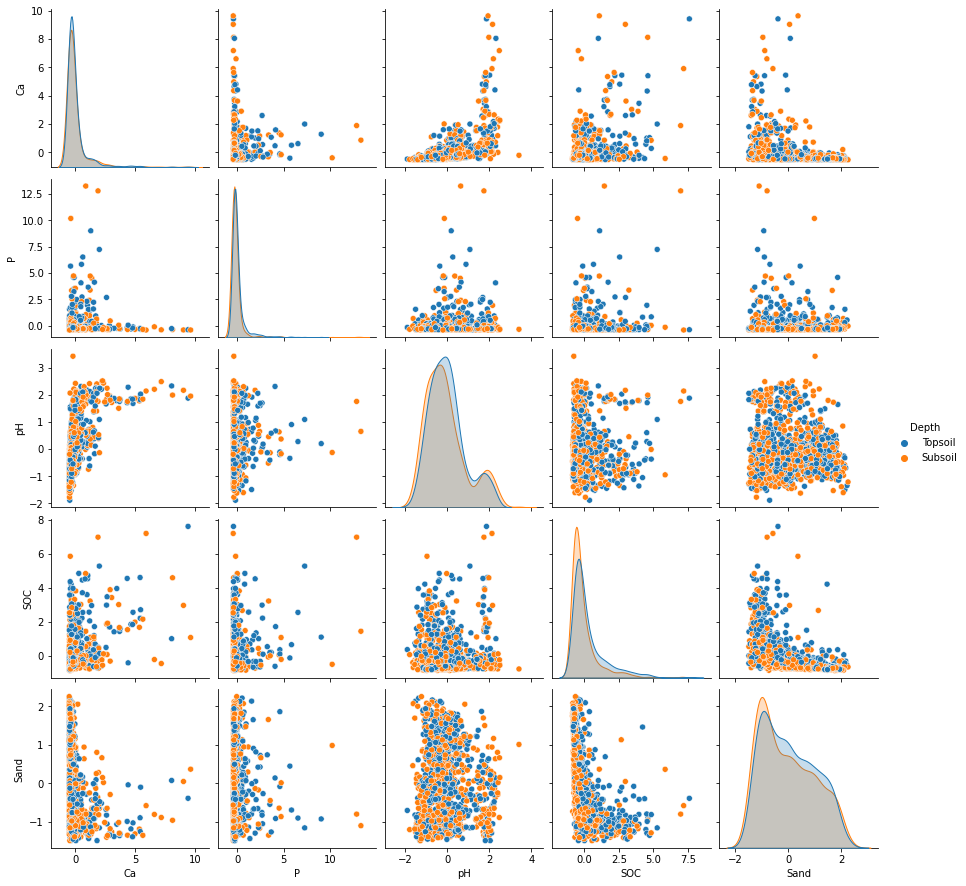

In [ ]:
import seaborn as sns

sns.pairplot(df,hue='Depth')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Depth'],
                                                    test_size=0.33)

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=33)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[124  64]
 [ 84 110]]
              precision    recall  f1-score   support

     Subsoil       0.60      0.66      0.63       188
     Topsoil       0.63      0.57      0.60       194

    accuracy                           0.61       382
   macro avg       0.61      0.61      0.61       382
weighted avg       0.61      0.61      0.61       382



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.612565445026178